In [2]:
#scaricare il dataset nel formato che si preferisce. Si richiede di verificare le dimensioni del dataset e i relativi metadati
import pandas as pd

In [3]:
# URL del dataset CSV
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [4]:
# Caricamento del dataset
data = pd.read_csv(url)

In [6]:
# Visualizzazione delle prime righe del dataset
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
# Dimensioni del dataset
data.shape

(429435, 67)

In [8]:
# Metadati del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [12]:
# Si chiede di trovare, per ogni continente:
 #a. il numero di casi fin dall'inizio della pandemia
 #b. la percentuale rispetto al totale mondiale del numero di casi

# Calcolo del numero totale di casi per continente
data['casi_cumulativi_location'] = data.groupby("location")["new_cases"].cumsum()

# Calcolo del totale dei casi per nazione
totali_per_location = data.groupby("location")["casi_cumulativi_location"].max()

# Calcolo della somma di casi per continente rispetto al totale mondiale
location_to_continent = data[['location', 'continent']].drop_duplicates().set_index('location')
totali_per_location = totali_per_location.to_frame(name='totale_cumulativo')
totali_per_location['continent'] = location_to_continent['continent']

# Calcolo dei totali cumulativi per continente
totali_per_continente = totali_per_location.groupby("continent")["totale_cumulativo"].sum()

# Mostra i risultati
print(totali_per_continente)

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: totale_cumulativo, dtype: float64


In [10]:
# Calcolo del totale complessivo dei casi cumulativi
totale_casi_mondiale = totali_per_continente.sum()

# Calcolo delle percentuali per continente
percentuali_per_continente = (totali_per_continente / totale_casi_mondiale * 100).round(2)

# Mostra le percentuali
percentuali_per_continente

continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: totale_cumulativo, dtype: float64

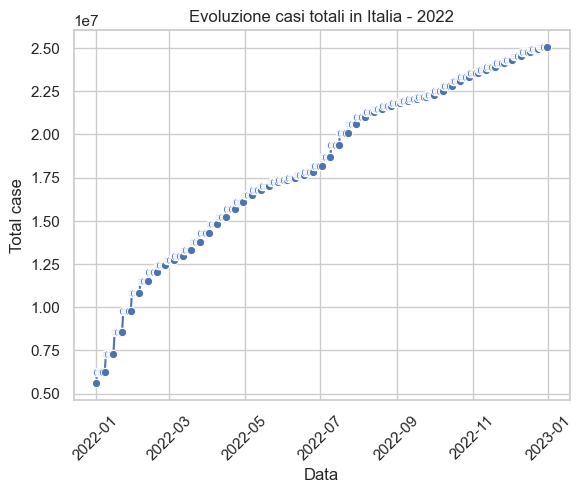

In [21]:
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
# b. il numero di nuovi casi rispetto alla data
    # k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

import seaborn as sns
import matplotlib.pyplot as plt

# Trasformare la colonna 'date' in formato datetime
data['date'] = pd.to_datetime(data['date'])

# Filtrare i dati per l'Italia nel 2022
italy_2022 = data[(data['location'] == "Italy") & (data['date'].dt.year == 2022)]

# Rimozione valori nulli
italy_2022 = italy_2022.dropna(subset=['total_cases'])

# Creazione grafico che evidenzia l'evoluzione dei casi totali
sns.set(style="whitegrid")
sns.lineplot(data=italy_2022, x='date', y='total_cases', marker='o')

# Personalizzazioni 
plt.title("Evoluzione casi totali in Italia - 2022")
plt.xlabel("Data")
plt.ylabel("Total case")
plt.xticks(rotation=45)
plt.show()

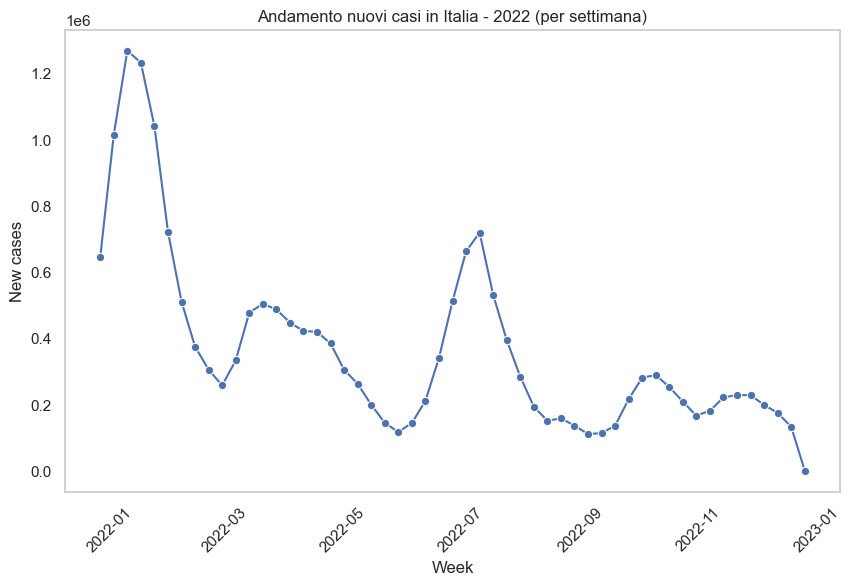

In [22]:
# Rimozione di valori nulli
italy_2022 = italy_2022.dropna(subset=['new_cases'])

# Raggruppamento dati per week
italy_2022['week'] = italy_2022['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_data = italy_2022.groupby('week')['new_cases'].sum().reset_index()

# Creazione grafico con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_data, x='week', y='new_cases', marker='o')
plt.title("Andamento nuovi casi in Italia - 2022 (per settimana)")
plt.xlabel("Week")
plt.ylabel("New cases")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza 
tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) 
da maggio 2022 (incluso) ad aprile 2023 (incluso) 

 a. scrivere un breve commento a riguardo

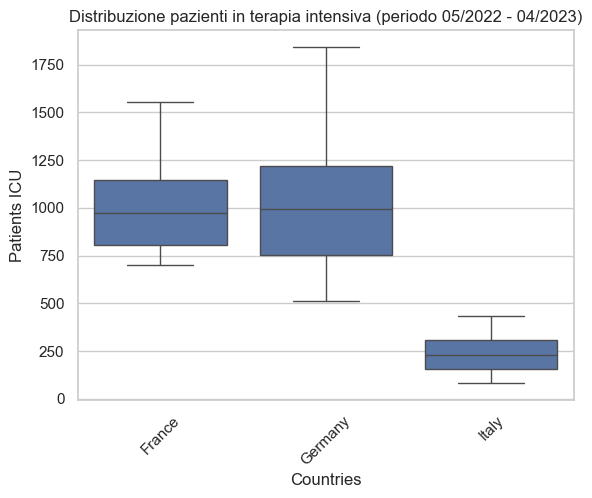

In [24]:
# Filtrare per Italia, Germania e Francia da maggio-2022 ad aprile-2023
locations = ['Italy', 'Germany', 'France']
period_data = data[
    (data['location'].isin(locations)) & 
    (data['date'] >= '2022-05-01') & 
    (data['date'] <= '2023-04-30')
]

# Rimozione righe senza dati ICU
period_data = period_data.dropna(subset=['icu_patients'])

# Creazione boxplot con Seaborn
sns.boxplot(data=period_data, x="location", y="icu_patients")

# Personalizzazioni del grafico
plt.title("Distribuzione pazienti in terapia intensiva (periodo 05/2022 - 04/2023)")
plt.xlabel("Countries")
plt.ylabel("Patients ICU")
plt.xticks(rotation=45)
plt.show()

Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
  a. mostrare la somma dei pazienti ospitalizzati per ognuna 
  b. se ci sono dati nulli, con un breve commento scrivere se 
     può essere possibile gestirli tramite sostituzione o meno

In [26]:
# Filtro per nazioni e per anno 2023
selected_countries = ['Italy', 'Germany', 'France', 'Spain']
data["date"] = pd.to_datetime(data["date"])
hospital_data_2023 = data[(data['location'].isin(selected_countries)) & (data['date'].dt.year == 2023)]

# Calcolo somma dei pazienti ospedalizzati per singola nazione
total_hospitalized = hospital_data_2023.groupby('location')['hosp_patients'].sum()

# Verifica dati nulli
missing_data = hospital_data_2023['hosp_patients'].isna().sum()

# Mostrare risultati
print("Somma pazienti ospedalizzati per nazione - 2023:\n", total_hospitalized)
print("\nDati assenti per pazienti ospedalizzati - 2023: ", missing_data)

Somma pazienti ospedalizzati per nazione - 2023:
 location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

Dati assenti per pazienti ospedalizzati - 2023:  843
